<a href="https://colab.research.google.com/github/Fatai-soliu/Topic_modelling/blob/main/Soliu_Fatai_Topic_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing neccessary libraries

import pandas as pd
import seaborn as sns
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Install dependencies

# Create a function that returns the required local i.e. UTF-8

import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [3]:
!pip install bertopic
!pip install flair
!apt-get -qq install -y libfluidsynth1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 12.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 17.4 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (73

In [4]:
# Load and read dataset

url = 'https://github.com/Fatai-soliu/Topic_modelling/raw/master/scopusfinaldataset.csv'

papers = pd.read_csv(url)

In [5]:
papers.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Link,Abstract,Author Keywords
0,Kini A.S.; Prema K.V.; Pai S.N.,"Kini, Anita S. (57215565803); Prema, K.V. (700...",57215565803; 7004512355; 55596416000,Early stage black pepper leaf disease predicti...,2024,Scientific Reports,https://www.scopus.com/inward/record.uri?eid=2...,"Plants get exposed to diseases, insects and fu...",NaN
1,Bassiouni M.M.; Chakrabortty R.K.; Sallam K.M....,"Bassiouni, Mahmoud M. (57189378510); Chakrabor...",57189378510; 55538597700; 57188813331; 8618708200,Deep learning approaches to identify order sta...,2024,Expert Systems with Applications,https://www.scopus.com/inward/record.uri?eid=2...,The emergence of artificial intelligence (AI) ...,Classifiers; Deep learning; Prediction models;...
2,Hussain E.; Mahanta L.B.; Borbora K.A.; Borah ...,"Hussain, Elima (57215190483); Mahanta, Lipi B....",57215190483; 36676387700; 57211313109; 5721648...,Exploring explainable artificial intelligence ...,2024,Expert Systems with Applications,https://www.scopus.com/inward/record.uri?eid=2...,Although artificial intelligence techniques ha...,Cervical intraepithelial neoplasia (CIN); Cerv...
3,Zafar M.H.; Langås E.F.; Sanfilippo F.,"Zafar, Muhammad Hamza (57220040342); Langås, E...",57220040342; 58833233900; 55388355200,Exploring the synergies between collaborative ...,2024,Robotics and Computer-Integrated Manufacturing,https://www.scopus.com/inward/record.uri?eid=2...,Industry 5.0 aims at establishing an inclusive...,Augmentation; Deep learning; Digital twins; HR...
4,Lee K.; Kim J.-H.; Hong H.; Jeong Y.; Ryu H.; ...,"Lee, Kyuwon (58131161700); Kim, Jeong-Hyun (58...",58131161700; 58131273200; 58960847100; 5896084...,Deep learning model for classifying shoulder p...,2024,Journal of NeuroEngineering and Rehabilitation,https://www.scopus.com/inward/record.uri?eid=2...,Background: Artificial intelligence is being u...,Deep learning model; Deep neural networks (DNN...


In [6]:
papers.describe(include = 'all')

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Link,Abstract,Author Keywords
count,9713,9713,9713,10000,10000.000000,10000,10000,10000,8731
unique,9589,9610,9589,9954,NaN,3498,10000,9625,8708
top,Matsuzaka Y.; Yashiro R.,"Matsuzaka, Yasunari (56329357600); Yashiro, Ry...",57222145499; 6602324472,International Conference on Advanced Intellige...,NaN,Lecture Notes in Networks and Systems,https://www.scopus.com/inward/record.uri?eid=2...,[No abstract available],Artificial Intelligence; Deep Learning; Machin...
freq,4,4,4,4,NaN,260,1,335,3
mean,NaN,NaN,NaN,NaN,2023.083000,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.560841,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,2022.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2023.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2023.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2023.000000,NaN,NaN,NaN,NaN


In [7]:

# summary of the columns in the dataset
# Totals rows of that is 303

papers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Authors            9713 non-null   object
 1   Author full names  9713 non-null   object
 2   Author(s) ID       9713 non-null   object
 3   Title              10000 non-null  object
 4   Year               10000 non-null  int64 
 5   Source title       10000 non-null  object
 6   Link               10000 non-null  object
 7   Abstract           10000 non-null  object
 8   Author Keywords    8731 non-null   object
dtypes: int64(1), object(8)
memory usage: 703.2+ KB


In [8]:

# Remove columns that does not relate to the task
# Add paper_text column

papers = papers.drop(columns=['Authors','Source title','Link'], axis=1)

#print out the first five rows of papers
papers.head()

,Author full names,Author(s) ID,Title,Year,Abstract,Author Keywords
0,"Kini, Anita S. (57215565803); Prema, K.V. (700...",57215565803; 7004512355; 55596416000,Early stage black pepper leaf disease predicti...,2024,"Plants get exposed to diseases, insects and fu...",NaN
1,"Bassiouni, Mahmoud M. (57189378510); Chakrabor...",57189378510; 55538597700; 57188813331; 8618708200,Deep learning approaches to identify order sta...,2024,The emergence of artificial intelligence (AI) ...,Classifiers; Deep learning; Prediction models;...
2,"Hussain, Elima (57215190483); Mahanta, Lipi B....",57215190483; 36676387700; 57211313109; 5721648...,Exploring explainable artificial intelligence ...,2024,Although artificial intelligence techniques ha...,Cervical intraepithelial neoplasia (CIN); Cerv...
3,"Zafar, Muhammad Hamza (57220040342); Langås, E...",57220040342; 58833233900; 55388355200,Exploring the synergies between collaborative ...,2024,Industry 5.0 aims at establishing an inclusive...,Augmentation; Deep learning; Digital twins; HR...
4,"Lee, Kyuwon (58131161700); Kim, Jeong-Hyun (58...",58131161700; 58131273200; 58960847100; 5896084...,Deep learning model for classifying shoulder p...,2024,Background: Artificial intelligence is being u...,Deep learning model; Deep neural networks (DNN...


In [9]:
# Add paper_text column
papers['paper_text'] = papers['Title'] + " " + papers['Abstract']

#print out the first five rows of papers
papers.head()

,Author full names,Author(s) ID,Title,Year,Abstract,Author Keywords,paper_text
0,"Kini, Anita S. (57215565803); Prema, K.V. (700...",57215565803; 7004512355; 55596416000,Early stage black pepper leaf disease predicti...,2024,"Plants get exposed to diseases, insects and fu...",NaN,Early stage black pepper leaf disease predicti...
1,"Bassiouni, Mahmoud M. (57189378510); Chakrabor...",57189378510; 55538597700; 57188813331; 8618708200,Deep learning approaches to identify order sta...,2024,The emergence of artificial intelligence (AI) ...,Classifiers; Deep learning; Prediction models;...,Deep learning approaches to identify order sta...
2,"Hussain, Elima (57215190483); Mahanta, Lipi B....",57215190483; 36676387700; 57211313109; 5721648...,Exploring explainable artificial intelligence ...,2024,Although artificial intelligence techniques ha...,Cervical intraepithelial neoplasia (CIN); Cerv...,Exploring explainable artificial intelligence ...
3,"Zafar, Muhammad Hamza (57220040342); Langås, E...",57220040342; 58833233900; 55388355200,Exploring the synergies between collaborative ...,2024,Industry 5.0 aims at establishing an inclusive...,Augmentation; Deep learning; Digital twins; HR...,Exploring the synergies between collaborative ...
4,"Lee, Kyuwon (58131161700); Kim, Jeong-Hyun (58...",58131161700; 58131273200; 58960847100; 5896084...,Deep learning model for classifying shoulder p...,2024,Background: Artificial intelligence is being u...,Deep learning model; Deep neural networks (DNN...,Deep learning model for classifying shoulder p...


In [10]:
# Remove missing values

papers = papers.dropna(axis='rows')

papers.head()

,Author full names,Author(s) ID,Title,Year,Abstract,Author Keywords,paper_text
1,"Bassiouni, Mahmoud M. (57189378510); Chakrabor...",57189378510; 55538597700; 57188813331; 8618708200,Deep learning approaches to identify order sta...,2024,The emergence of artificial intelligence (AI) ...,Classifiers; Deep learning; Prediction models;...,Deep learning approaches to identify order sta...
2,"Hussain, Elima (57215190483); Mahanta, Lipi B....",57215190483; 36676387700; 57211313109; 5721648...,Exploring explainable artificial intelligence ...,2024,Although artificial intelligence techniques ha...,Cervical intraepithelial neoplasia (CIN); Cerv...,Exploring explainable artificial intelligence ...
3,"Zafar, Muhammad Hamza (57220040342); Langås, E...",57220040342; 58833233900; 55388355200,Exploring the synergies between collaborative ...,2024,Industry 5.0 aims at establishing an inclusive...,Augmentation; Deep learning; Digital twins; HR...,Exploring the synergies between collaborative ...
4,"Lee, Kyuwon (58131161700); Kim, Jeong-Hyun (58...",58131161700; 58131273200; 58960847100; 5896084...,Deep learning model for classifying shoulder p...,2024,Background: Artificial intelligence is being u...,Deep learning model; Deep neural networks (DNN...,Deep learning model for classifying shoulder p...
6,"Mathivanan, Sandeep Kumar (57204726299); Sonai...",57204726299; 58961075500; 58960026900; 5710022...,Employing deep learning and transfer learning ...,2024,Artificial intelligence-powered deep learning ...,Artificial intelligence; Brain tumor; Diagnosi...,Employing deep learning and transfer learning ...


# Text Preprocessing

The Text preprocessing step will be carried out in the following step

1. Data Cleaning
2. Tokenization
3. Stopword Removal
4. Normalization
5. Text Encoding
6. Vectorization
7. Data Splitting

In [11]:
!pip install contractions
import contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 11.8 MB/s eta 0:00:00


In [12]:
#Import neccessary libraries for text preprocessing

import re
from string import punctuation
import contractions

In [13]:

#Create a function for preprocessing

def clean_text(text):
    # make text lowercase
    text = str(text).lower()
    text = re.sub(r"[’']", "", text)
    # expand contractions
    text = " ".join([contractions.fix(expanded_word) for expanded_word in text.split()])
    # remove text in square brackets
    text = re.sub('\[.*?\]', '', text)
    # remove links
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    # remove punctuation
    text = re.sub('[%s]' % re.escape(punctuation), '', text)
    # remove new lines
    text = re.sub('\n', '', text)
    # remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)
    # remove apostrophes
    text = re.sub("''", '', text)
    return text

In [14]:
# apply function on each text in the dataset

papers['paper_text_preprocessed'] = papers['paper_text'].apply(lambda x: clean_text(x))

papers.head()

,Author full names,Author(s) ID,Title,Year,Abstract,Author Keywords,paper_text,paper_text_preprocessed
1,"Bassiouni, Mahmoud M. (57189378510); Chakrabor...",57189378510; 55538597700; 57188813331; 8618708200,Deep learning approaches to identify order sta...,2024,The emergence of artificial intelligence (AI) ...,Classifiers; Deep learning; Prediction models;...,Deep learning approaches to identify order sta...,deep learning approaches to identify order sta...
2,"Hussain, Elima (57215190483); Mahanta, Lipi B....",57215190483; 36676387700; 57211313109; 5721648...,Exploring explainable artificial intelligence ...,2024,Although artificial intelligence techniques ha...,Cervical intraepithelial neoplasia (CIN); Cerv...,Exploring explainable artificial intelligence ...,exploring explainable artificial intelligence ...
3,"Zafar, Muhammad Hamza (57220040342); Langås, E...",57220040342; 58833233900; 55388355200,Exploring the synergies between collaborative ...,2024,Industry 5.0 aims at establishing an inclusive...,Augmentation; Deep learning; Digital twins; HR...,Exploring the synergies between collaborative ...,exploring the synergies between collaborative ...
4,"Lee, Kyuwon (58131161700); Kim, Jeong-Hyun (58...",58131161700; 58131273200; 58960847100; 5896084...,Deep learning model for classifying shoulder p...,2024,Background: Artificial intelligence is being u...,Deep learning model; Deep neural networks (DNN...,Deep learning model for classifying shoulder p...,deep learning model for classifying shoulder p...
6,"Mathivanan, Sandeep Kumar (57204726299); Sonai...",57204726299; 58961075500; 58960026900; 5710022...,Employing deep learning and transfer learning ...,2024,Artificial intelligence-powered deep learning ...,Artificial intelligence; Brain tumor; Diagnosi...,Employing deep learning and transfer learning ...,employing deep learning and transfer learning ...


# Tokenization

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
from nltk.tokenize import word_tokenize
papers['paper_words'] = papers['paper_text_preprocessed'].apply(lambda x:word_tokenize(str(x)))
papers.head()

,Author full names,Author(s) ID,Title,Year,Abstract,Author Keywords,paper_text,paper_text_preprocessed,paper_words
1,"Bassiouni, Mahmoud M. (57189378510); Chakrabor...",57189378510; 55538597700; 57188813331; 8618708200,Deep learning approaches to identify order sta...,2024,The emergence of artificial intelligence (AI) ...,Classifiers; Deep learning; Prediction models;...,Deep learning approaches to identify order sta...,deep learning approaches to identify order sta...,"[deep, learning, approaches, to, identify, ord..."
2,"Hussain, Elima (57215190483); Mahanta, Lipi B....",57215190483; 36676387700; 57211313109; 5721648...,Exploring explainable artificial intelligence ...,2024,Although artificial intelligence techniques ha...,Cervical intraepithelial neoplasia (CIN); Cerv...,Exploring explainable artificial intelligence ...,exploring explainable artificial intelligence ...,"[exploring, explainable, artificial, intellige..."
3,"Zafar, Muhammad Hamza (57220040342); Langås, E...",57220040342; 58833233900; 55388355200,Exploring the synergies between collaborative ...,2024,Industry 5.0 aims at establishing an inclusive...,Augmentation; Deep learning; Digital twins; HR...,Exploring the synergies between collaborative ...,exploring the synergies between collaborative ...,"[exploring, the, synergies, between, collabora..."
4,"Lee, Kyuwon (58131161700); Kim, Jeong-Hyun (58...",58131161700; 58131273200; 58960847100; 5896084...,Deep learning model for classifying shoulder p...,2024,Background: Artificial intelligence is being u...,Deep learning model; Deep neural networks (DNN...,Deep learning model for classifying shoulder p...,deep learning model for classifying shoulder p...,"[deep, learning, model, for, classifying, shou..."
6,"Mathivanan, Sandeep Kumar (57204726299); Sonai...",57204726299; 58961075500; 58960026900; 5710022...,Employing deep learning and transfer learning ...,2024,Artificial intelligence-powered deep learning ...,Artificial intelligence; Brain tumor; Diagnosi...,Employing deep learning and transfer learning ...,employing deep learning and transfer learning ...,"[employing, deep, learning, and, transfer, lea..."


# Stop words removal

In [17]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
# define stopword removal function
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', "'",'used','using','one','two','also','use','us','may','ai'])

def remove_stopword(word_list):
    return [word for word in word_list if word not in stop_words]

papers['paper_words_excl_sw'] = papers['paper_words'].apply(lambda x: remove_stopword(x))

In [19]:
papers.head()

,Author full names,Author(s) ID,Title,Year,Abstract,Author Keywords,paper_text,paper_text_preprocessed,paper_words,paper_words_excl_sw
1,"Bassiouni, Mahmoud M. (57189378510); Chakrabor...",57189378510; 55538597700; 57188813331; 8618708200,Deep learning approaches to identify order sta...,2024,The emergence of artificial intelligence (AI) ...,Classifiers; Deep learning; Prediction models;...,Deep learning approaches to identify order sta...,deep learning approaches to identify order sta...,"[deep, learning, approaches, to, identify, ord...","[deep, learning, approaches, identify, order, ..."
2,"Hussain, Elima (57215190483); Mahanta, Lipi B....",57215190483; 36676387700; 57211313109; 5721648...,Exploring explainable artificial intelligence ...,2024,Although artificial intelligence techniques ha...,Cervical intraepithelial neoplasia (CIN); Cerv...,Exploring explainable artificial intelligence ...,exploring explainable artificial intelligence ...,"[exploring, explainable, artificial, intellige...","[exploring, explainable, artificial, intellige..."
3,"Zafar, Muhammad Hamza (57220040342); Langås, E...",57220040342; 58833233900; 55388355200,Exploring the synergies between collaborative ...,2024,Industry 5.0 aims at establishing an inclusive...,Augmentation; Deep learning; Digital twins; HR...,Exploring the synergies between collaborative ...,exploring the synergies between collaborative ...,"[exploring, the, synergies, between, collabora...","[exploring, synergies, collaborative, robotics..."
4,"Lee, Kyuwon (58131161700); Kim, Jeong-Hyun (58...",58131161700; 58131273200; 58960847100; 5896084...,Deep learning model for classifying shoulder p...,2024,Background: Artificial intelligence is being u...,Deep learning model; Deep neural networks (DNN...,Deep learning model for classifying shoulder p...,deep learning model for classifying shoulder p...,"[deep, learning, model, for, classifying, shou...","[deep, learning, model, classifying, shoulder,..."
6,"Mathivanan, Sandeep Kumar (57204726299); Sonai...",57204726299; 58961075500; 58960026900; 5710022...,Employing deep learning and transfer learning ...,2024,Artificial intelligence-powered deep learning ...,Artificial intelligence; Brain tumor; Diagnosi...,Employing deep learning and transfer learning ...,employing deep learning and transfer learning ...,"[employing, deep, learning, and, transfer, lea...","[employing, deep, learning, transfer, learning..."


# Lemmatization

After removing stopwords, I applied lemmatization technique to further preprocess the text data by converting each word to its base form

In [20]:
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
papers['paper_words_excl_sw'] = papers['paper_words_excl_sw'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
papers.tail()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,Author full names,Author(s) ID,Title,Year,Abstract,Author Keywords,paper_text,paper_text_preprocessed,paper_words,paper_words_excl_sw
9995,"Jiang, Weiwei (57188758602)",57188758602,Cellular traffic prediction with machine learn...,2022,Cellular networks are important for the succes...,Cellular network; Clustering; Decomposition; D...,Cellular traffic prediction with machine learn...,cellular traffic prediction with machine learn...,"[cellular, traffic, prediction, with, machine,...","[cellular, traffic, prediction, machine, learn..."
9996,"Reddy, Jagadesh C (54889680100); Bhamidipati, ...",54889680100; 57563713300; 57564472600; 5756396...,KEDOP: Keratoconus early detection of progress...,2022,Purpose: To investigate a method to identifica...,artificial intelligence; collagen crosslinking...,KEDOP: Keratoconus early detection of progress...,kedop keratoconus early detection of progressi...,"[kedop, keratoconus, early, detection, of, pro...","[kedop, keratoconus, early, detection, progres..."
9997,"Hu, Bo (56233668300); Li, Jiaxi (57211006710)",56233668300; 57211006710,An Adaptive Hierarchical Energy Management Str...,2022,With the development of artificial intelligenc...,Energy management strategy (EMS); heuristic kn...,An Adaptive Hierarchical Energy Management Str...,an adaptive hierarchical energy management str...,"[an, adaptive, hierarchical, energy, managemen...","[adaptive, hierarchical, energy, management, s..."
9998,"Seetharam, Karthik (57194089320); Balla, Sudar...",57194089320; 35209479000; 57212825150; 7202073...,Applications of Machine Learning in Cardiology,2022,"In this digital era, artificial intelligence (...",Artificial intelligence; Cardiovascular Imagin...,Applications of Machine Learning in Cardiology...,applications of machine learning in cardiology...,"[applications, of, machine, learning, in, card...","[application, machine, learning, cardiology, d..."
9999,"Shi, Xu (57667114700); Wang, Long (57875628500...",57667114700; 57875628500; 56984221600; 5773134...,GCLDNet: Gastric cancer lesion detection netwo...,2022,Background: Analysis of histopathological slic...,artificial intelligence; attention feature fus...,GCLDNet: Gastric cancer lesion detection netwo...,gcldnet gastric cancer lesion detection networ...,"[gcldnet, gastric, cancer, lesion, detection, ...","[gcldnet, gastric, cancer, lesion, detection, ..."


In [21]:
papers['paper_words_excl_sw'] = papers['paper_words_excl_sw'].astype(str)

# Visualize the data using wordcloud package

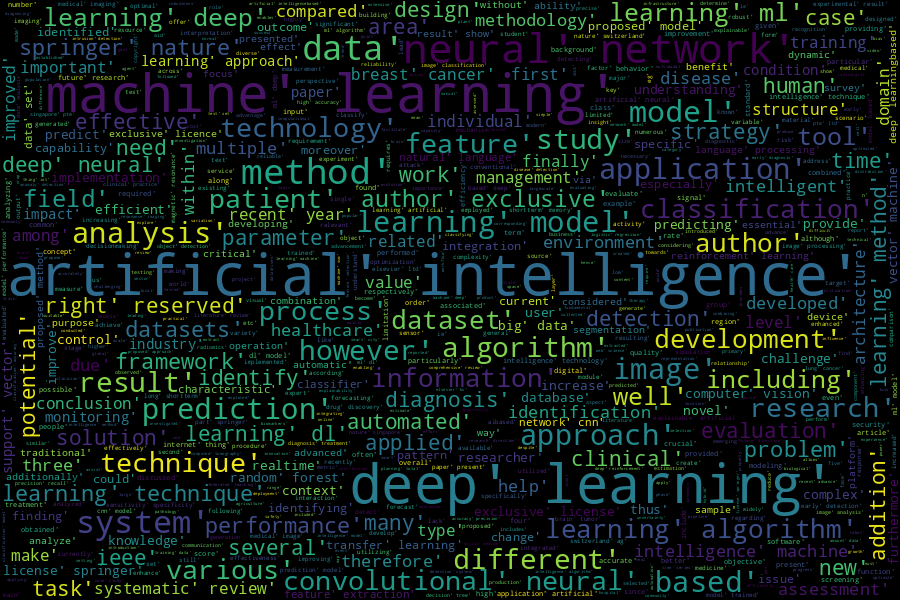

In [22]:
# Visualize the data using wordcloud package
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together
long_string = ','.join((str(l) for l in papers['paper_words_excl_sw']))

# Create a WordCloud object
wordcloud = WordCloud(background_color="black", max_words=3000, contour_width=3, contour_color='steelblue', width = 900, height = 600)

#Generate a word cloud
wordcloud.generate(long_string)

#Visualize the word cloud
wordcloud.to_image()

# LDA Analysis

In [23]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))


data = papers['paper_words_excl_sw'].tolist()
data_words = list(sent_to_words(data))


print(data_words[:2][0][:10])

['deep', 'learning', 'approach', 'identify', 'order', 'status', 'complex', 'supply', 'chain', 'emergence']


In [24]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:10])

[(0, 1), (1, 4), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2)]


# LDA model training

In [25]:

from pprint import pprint

# number of topics
num_topics = 6

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.016*"learning" + 0.014*"data" + 0.010*"method" + 0.009*"artificial" + '
  '0.009*"intelligence" + 0.008*"model" + 0.008*"deep" + 0.007*"machine" + '
  '0.006*"research" + 0.006*"system"'),
 (1,
  '0.019*"model" + 0.015*"learning" + 0.011*"deep" + 0.009*"data" + '
  '0.008*"machine" + 0.008*"artificial" + 0.008*"method" + '
  '0.008*"intelligence" + 0.007*"accuracy" + 0.007*"study"'),
 (2,
  '0.016*"learning" + 0.011*"image" + 0.011*"intelligence" + '
  '0.010*"artificial" + 0.010*"model" + 0.009*"deep" + 0.009*"machine" + '
  '0.007*"data" + 0.007*"method" + 0.007*"application"'),
 (3,
  '0.026*"model" + 0.013*"learning" + 0.011*"data" + 0.009*"deep" + '
  '0.009*"study" + 0.007*"patient" + 0.007*"artificial" + 0.006*"machine" + '
  '0.006*"result" + 0.006*"intelligence"'),
 (4,
  '0.024*"learning" + 0.013*"model" + 0.012*"deep" + 0.011*"machine" + '
  '0.010*"network" + 0.008*"data" + 0.007*"technique" + 0.007*"algorithm" + '
  '0.007*"method" + 0.007*"system"'),
 (5,
  '0.0

# Analyzing LDA model

Now, let's visualize the topics to identify patterns for interpretability using pyLDAvis

In [26]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 16.6 MB/s eta 0:00:00


In [27]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
import os

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('content_'+str(num_topics) + '.pickle')

if not os.path.exists(LDAvis_data_filepath):
    # Prepare the LDA visualization data
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    # Save the prepared data to disk
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
else:
    # Load the pre-prepared pyLDAvis data from disk
    with open(LDAvis_data_filepath, 'rb') as f:
        LDAvis_prepared = pickle.load(f)

# Save the HTML visualization
pyLDAvis.save_html(LDAvis_prepared, 'content_'+ str(num_topics) +'.html')

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.007666 -0.015100       1        1  24.165585
0      0.035068 -0.010944       2        1  19.581375
4     -0.000721 -0.010779       3        1  17.536606
1     -0.030911 -0.007862       4        1  15.522102
3     -0.037987  0.014685       5        1  14.151844
5      0.026885  0.030001       6        1   9.042488, topic_info=            Term          Freq         Total Category  logprob  loglift
70         model  17093.000000  17093.000000  Default  30.0000  30.0000
218  application   5693.000000   5693.000000  Default  29.0000  29.0000
291        study   7874.000000   7874.000000  Default  28.0000  28.0000
101     research   5868.000000   5868.000000  Default  27.0000  27.0000
191      patient   3796.000000   3796.000000  Default  26.0000  26.0000
..           ...           ...           ...      ...      ...      ...
192  performance    350.238615   4624.080069   Topic6  -5.7653  -0.1772
72       network    405.329364   7825.798464   Topic6  -5.6192  -0.5572
399    detection    352.063630   5323.071175   Topic6  -5.7601  -0.3128
171        image    348.563135   6483.487275   Topic6  -5.7701  -0.5200
132    algorithm    332.770170   6202.555523   Topic6  -5.8164  -0.5220

[562 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
1          1  0.210860  accuracy
1          2  0.098979  accuracy
1          3  0.216060  accuracy
1          4  0.273637  accuracy
1          5  0.142307  accuracy
...      ...       ...       ...
24268      3  0.890723       xrf
11982      1  0.052477  zoonotic
11982      2  0.026238  zoonotic
11982      3  0.892108  zoonotic
28011      3  0.937948        zt

[1546 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 5, 2, 4, 6])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


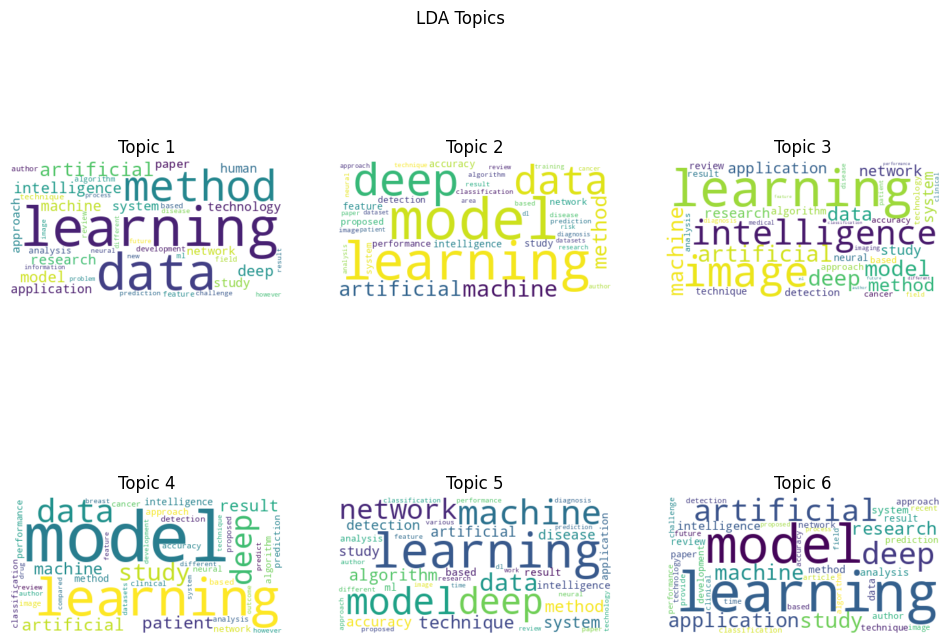

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.tight_layout(pad=3.0)
plt.suptitle("LDA Topics")

num_topics = lda_model.num_topics

num_cols = 3
num_rows = (num_topics + num_cols - 1) // num_cols

for i in range(1, num_topics + 1):
    plt.subplot(num_rows, num_cols, i)
    wordcloud = WordCloud(background_color='white').fit_words(dict(lda_model.show_topic(i - 1, topn=40)))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title("Topic " + str(i))
    plt.axis("off")

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


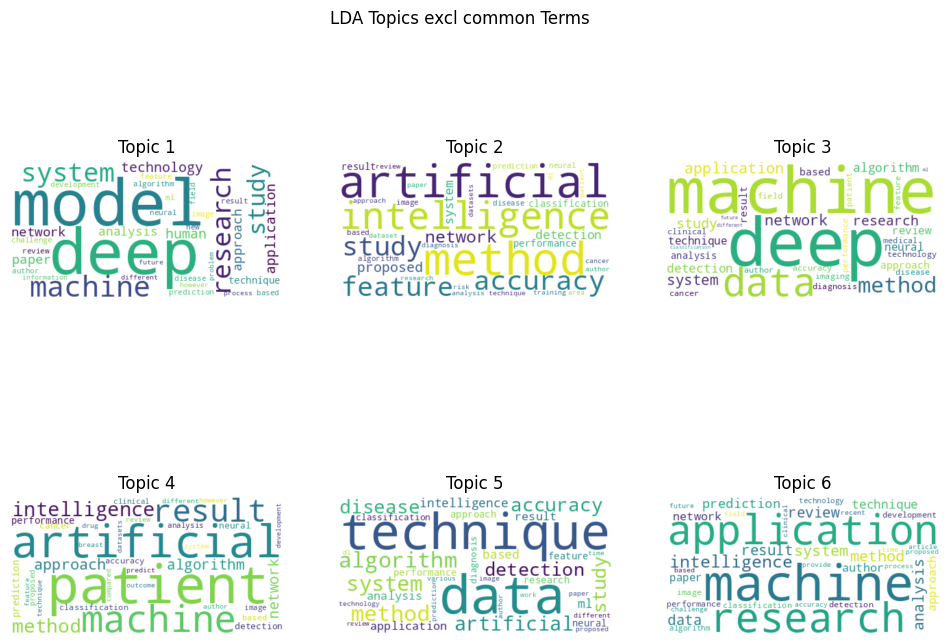

In [29]:
plt.figure(figsize=(12, 8))
plt.tight_layout(pad=3.0)
plt.suptitle("LDA Topics excl common Terms")

num_topics = lda_model.num_topics

num_cols = 3
num_rows = (num_topics + num_cols - 1) // num_cols

for i in range(1, num_topics + 1):
    plt.subplot(num_rows, num_cols, i)
    topic_words = lda_model.show_topic(i - 1, topn=40)
    # Excluding the first three most frequent words
    topic_words = topic_words[5:]
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(dict(topic_words))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title("Topic " + str(i))
    plt.axis("off")

plt.show()

# BerTopic

In [30]:
!pip install sentence-transformers

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
# Data processing
import pandas as pd
import numpy as np
# Text preprocessiong
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()
# Topic model
from bertopic import BERTopic
# Dimension reduction
from umap import UMAP
# Clustering
from hdbscan import HDBSCAN
from sklearn.cluster import KMeans
# Count vectorization
from sklearn.feature_extraction.text import CountVectorizer
# Sentence transformer
from sentence_transformers import SentenceTransformer
# Flair
from transformers.pipelines import pipeline
from flair.embeddings import TransformerDocumentEmbeddings, WordEmbeddings, DocumentPoolEmbeddings, StackedEmbeddings

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.10/dist-packages/skimage/util/dtype.py:27: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


In [32]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=100)
# Clustering model
# hdbscan_model = HDBSCAN(min_cluster_size=5, min_samples = 5,
# metric='euclidean', prediction_data=True)
kmeans_model = KMeans(n_clusters=9)
# Initiate a sentence transformer model
sentence_model = SentenceTransformer("paraphrase-albert-small-v2")
# Initiate a pretrained model
hf_model = pipeline("feature-extraction", model="distilroberta-base")

# Initiate a pretrained embedding model
roberta_model = TransformerDocumentEmbeddings('roberta-base')
# Initiate another pretrained embedding model
glove_embedding = WordEmbeddings('crawl')
document_glove_embeddings = DocumentPoolEmbeddings([glove_embedding])
# Stack the two pretrained embedding models
stacked_embeddings = StackedEmbeddings(embeddings=[roberta_model,
document_glove_embeddings])

# Count vectorizer
vectorizer_model = CountVectorizer(min_df=10)

# Initiate BERTopic
# topic_model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True,hdbscan_model=kmeans_model,
#                        embedding_model=stacked_embeddings,min_topic_size=5, n_gram_range=(1, 3),diversity=0.8)#vectorizer_model=vectorizer_model)# Other options for embedding_model are sentence_model, hf_model,roberta_model

# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True,hdbscan_model=kmeans_model, n_gram_range=(1, 3))
# Run BERTopic model
topics, probabilities = topic_model.fit_transform(papers['paper_words_excl_sw'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.06k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/827 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.7M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/245 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

2024-04-23 08:13:23,677 https://flair.informatik.hu-berlin.de/resources/embeddings/token/en-fasttext-crawl-300d-1M.vectors.npy not found in cache, downloading to /tmp/tmpaxml1wdw


100%|██████████| 1.12G/1.12G [02:33<00:00, 7.83MB/s]

2024-04-23 08:15:57,594 copying /tmp/tmpaxml1wdw to cache at /root/.flair/embeddings/en-fasttext-crawl-300d-1M.vectors.npy


2024-04-23 08:16:01,729 removing temp file /tmp/tmpaxml1wdw
2024-04-23 08:16:02,792 https://flair.informatik.hu-berlin.de/resources/embeddings/token/en-fasttext-crawl-300d-1M not found in cache, downloading to /tmp/tmpz_eezmv6


100%|██████████| 37.5M/37.5M [00:03<00:00, 12.1MB/s]

2024-04-23 08:16:06,615 copying /tmp/tmpz_eezmv6 to cache at /root/.flair/embeddings/en-fasttext-crawl-300d-1M
2024-04-23 08:16:06,662 removing temp file /tmp/tmpz_eezmv6


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [33]:
# Get the list of topics
topic_model.get_topic_info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic,Count,Name,Representation,Representative_Docs
0,0,1734,0_learning_model_deep_data,"[learning, model, deep, data, machine, network...","[['deep', 'learning', 'power', 'quality', 'pap..."
1,1,1479,1_model_learning_data_artificial,"[model, learning, data, artificial, patient, i...","[['artificial', 'intelligence', 'disease', 'di..."
2,2,1188,2_learning_intelligence_artificial_model,"[learning, intelligence, artificial, model, ar...","[['construction', 'english', 'teaching', 'syst..."
3,3,1171,3_cancer_image_model_learning,"[cancer, image, model, learning, diagnosis, de...","[['reviewing', 'landscape', 'deep', 'learning'..."
4,4,968,4_model_learning_data_deep,"[model, learning, data, deep, machine, method,...","[['optimized', 'classification', 'model', 'pla..."
5,5,860,5_learning_network_model_data,"[learning, network, model, data, attack, syste...","[['hybrid', 'intelligent', 'intrusion', 'detec..."
6,6,741,6_learning_model_brain_image,"[learning, model, brain, image, disease, deep,...","[['synthesizing', 'human', 'brain', 'ct', 'ima..."
7,7,443,7_drug_learning_discovery_model,"[drug, learning, discovery, model, protein, dr...","[['exploring', 'artificial', 'intelligence', '..."
8,8,144,8_editorial_artificial_intelligence_artificial...,"[editorial, artificial, intelligence, artifici...","[['editorial', 'artificial', 'intelligence', '..."


In [34]:

# Get top 10 terms for a topic
topic_model.get_topic(0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('learning', 0.01984927922321822),
 ('model', 0.015915755487783928),
 ('deep', 0.01405724144690214),
 ('data', 0.013222985372280649),
 ('machine', 0.012095687713690935),
 ('network', 0.011360071767947398),
 ('method', 0.010526491699389573),
 ('deep learning', 0.010154975936940836),
 ('artificial', 0.009578887906661004),
 ('machine learning', 0.009480731045454169)]

In [35]:
# Visualize top topic keywords
topic_model.visualize_barchart(top_n_topics=7)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
# Visualize term rank decrease
topic_model.visualize_term_rank()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [37]:
# Visualize intertopic distance
topic_model.visualize_topics(top_n_topics=7)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [38]:
# Visualize connections between topics using hierachical clustering
topic_model.visualize_hierarchy(top_n_topics=7)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/plotly/figure_factory/_dendrogram.py:350: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.10/dist-packages/plotly/figure_factory/_dendrogram.py:351: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.10/dist-packages/plotly/figure_factory/_dendrogram.py:352: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.10/dist-packages/plotly/figure_factory/_dendrogram.py:353: DeprecationWarning:


In [39]:
# Visualize similarity using heatmap
topic_model.visualize_heatmap()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [40]:
# Get the topic predictions
topic_prediction = topic_model.topics_[:]
# Save the predictions in the dataframe
papers['topic_prediction'] = topic_prediction
# Take a look at the data
papers.head(15)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Author full names,Author(s) ID,Title,Year,Abstract,Author Keywords,paper_text,paper_text_preprocessed,paper_words,paper_words_excl_sw,topic_prediction
1,"Bassiouni, Mahmoud M. (57189378510); Chakrabor...",57189378510; 55538597700; 57188813331; 8618708200,Deep learning approaches to identify order sta...,2024,The emergence of artificial intelligence (AI) ...,Classifiers; Deep learning; Prediction models;...,Deep learning approaches to identify order sta...,deep learning approaches to identify order sta...,"[deep, learning, approaches, to, identify, ord...","['deep', 'learning', 'approach', 'identify', '...",0
2,"Hussain, Elima (57215190483); Mahanta, Lipi B....",57215190483; 36676387700; 57211313109; 5721648...,Exploring explainable artificial intelligence ...,2024,Although artificial intelligence techniques ha...,Cervical intraepithelial neoplasia (CIN); Cerv...,Exploring explainable artificial intelligence ...,exploring explainable artificial intelligence ...,"[exploring, explainable, artificial, intellige...","['exploring', 'explainable', 'artificial', 'in...",3
3,"Zafar, Muhammad Hamza (57220040342); Langås, E...",57220040342; 58833233900; 55388355200,Exploring the synergies between collaborative ...,2024,Industry 5.0 aims at establishing an inclusive...,Augmentation; Deep learning; Digital twins; HR...,Exploring the synergies between collaborative ...,exploring the synergies between collaborative ...,"[exploring, the, synergies, between, collabora...","['exploring', 'synergy', 'collaborative', 'rob...",2
4,"Lee, Kyuwon (58131161700); Kim, Jeong-Hyun (58...",58131161700; 58131273200; 58960847100; 5896084...,Deep learning model for classifying shoulder p...,2024,Background: Artificial intelligence is being u...,Deep learning model; Deep neural networks (DNN...,Deep learning model for classifying shoulder p...,deep learning model for classifying shoulder p...,"[deep, learning, model, for, classifying, shou...","['deep', 'learning', 'model', 'classifying', '...",2
6,"Mathivanan, Sandeep Kumar (57204726299); Sonai...",57204726299; 58961075500; 58960026900; 5710022...,Employing deep learning and transfer learning ...,2024,Artificial intelligence-powered deep learning ...,Artificial intelligence; Brain tumor; Diagnosi...,Employing deep learning and transfer learning ...,employing deep learning and transfer learning ...,"[employing, deep, learning, and, transfer, lea...","['employing', 'deep', 'learning', 'transfer', ...",6
9,"Qayyum, Faiza (57225395084); Samee, Nagwan Abd...",57225395084; 55326012400; 55650519900; 5883815...,Shapley-based interpretation of deep learning ...,2024,Background: Predicting wildfire progression is...,Explainable Artificial Intelligence; Machine l...,Shapley-based interpretation of deep learning ...,shapleybased interpretation of deep learning m...,"[shapleybased, interpretation, of, deep, learn...","['shapleybased', 'interpretation', 'deep', 'le...",0
11,"Albano, Domenico (57189007335); Galiano, Vanes...",57189007335; 58905367500; 58073005600; 5889406...,Artificial intelligence for radiographic imagi...,2024,Background: The aim of this systematic review ...,Artificial intelligence; Caries lesion; Detect...,Artificial intelligence for radiographic imagi...,artificial intelligence for radiographic imagi...,"[artificial, intelligence, for, radiographic, ...","['artificial', 'intelligence', 'radiographic',...",1
12,"Zakieldin, Kamal (58960573600); Khattab, Radwa...",58960573600; 58960573700; 58960786100; 5896035...,ViTCN: Hybrid Vision Transformer with Temporal...,2024,"In Talentino, HR-Solution analyzes candidates’...",Computer-vision; Deep-learning; Emotion-recogn...,ViTCN: Hybrid Vision Transformer with Temporal...,vitcn hybrid vision transformer with temporal ...,"[vitcn, hybrid, vision, transformer, with, tem...","['vitcn', 'hybrid', 'vision', 'transformer', '...",2
13,"Obaid, Ahmed Mahdi (57807265600); Turki, Amina...",57807265600; 36615925100; 23391915400; 1280477...,Diagnosis of Gallbladder Diseas

In [41]:
# New data for the review
new_review = "AI has revolutionized various industries by enabling machines to learn from data, adapt to new information, and perform tasks that typically require human intelligence."
# Find topics
num_of_topics = 3
similar_topics, similarity = topic_model.find_topics(new_review, top_n=num_of_topics);
# Print results
print(f'The top {num_of_topics} similar topics are {similar_topics}, and the similarities are {np.round(similarity,2)}')

The top 3 similar topics are [0, 5, 8], and the similarities are [0.35 0.34 0.34]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [42]:
# Print the top keywords for the top similar topics
for i in range(num_of_topics):
  print(f'The top keywords for topic {similar_topics[i]} are:')
  print(topic_model.get_topic(similar_topics[i]))

The top keywords for topic 0 are:
[('learning', 0.01984927922321822), ('model', 0.015915755487783928), ('deep', 0.01405724144690214), ('data', 0.013222985372280649), ('machine', 0.012095687713690935), ('network', 0.011360071767947398), ('method', 0.010526491699389573), ('deep learning', 0.010154975936940836), ('artificial', 0.009578887906661004), ('machine learning', 0.009480731045454169)]
The top keywords for topic 5 are:
[('learning', 0.018396433697927254), ('network', 0.01765160904476737), ('model', 0.014652283952436323), ('data', 0.01369213164845917), ('attack', 0.013559398424586042), ('system', 0.01347006846074193), ('security', 0.012451521138390821), ('detection', 0.01214480474535857), ('machine', 0.01161403485622705), ('deep', 0.01140383059561543)]
The top keywords for topic 8 are:
[('editorial', 0.16563813872459132), ('artificial', 0.08379608420319495), ('intelligence', 0.08151474533347339), ('artificial intelligence', 0.08035118152606757), ('editorial artificial', 0.0299610191

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [43]:
# Save the topic model
topic_model.save("papers_abstract_topic_model")
# Load the topic model
my_model = BERTopic.load("papers_abstract_topic_model")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

2024-04-23 08:48:01,856 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

